<a href="https://colab.research.google.com/github/yuliagrajewska/rivercrossig/blob/main/Numerical_Methods_ODEs_for_optimal_river_crossing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#imports
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('bmh')
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

In [2]:
#init data
a = 200 #half-length, m
v_swimmer = 1 #speed of the swimmer m/s
v_water = 0.889 #max speed of water, m/s
b=0 #initial angle


In [3]:
#interpolation code
def interpolate(xi, yi): #polynomial interpolation using matrix operations
    ai = []
    x_matrix = []
    for j in range(0,len(xi)):
        x_matrix.append([])
        for i in range(0,len(xi)):
            x_matrix[j].append(np.power(xi[j],len(xi)-1-i))

    #inverse of the matrix with x data
    x_inverted = np.linalg.inv(x_matrix)

    #dot product inverse matrix * yi
    ai = np.dot(x_inverted, np.transpose(yi))

    #printing the result
    a = ai[::-1]
    return a


In [4]:
#secant method, polynomial functions
def f(x,arr):
    return (arr[0]+arr[1]*x+arr[2]*(x**2)+arr[3]*(x**3))
def f2(x,arr):
    return (arr[0]+arr[1]*x+arr[2]*(x**2)+arr[3]*(x**3)+arr[4]*(x**4))
def secant(f,a,b,arr):
  c = 0
  while np.absolute(f(b,arr)) >= 0.5 * 0.0001:
    c = b
    if b!=a:
      b = b - (b-a)*f(b,arr)/(f(b,arr)-f(a,arr))
      a = c
    return(b)

Text(0.5, 1.0, 'Trajectories for different values of β')

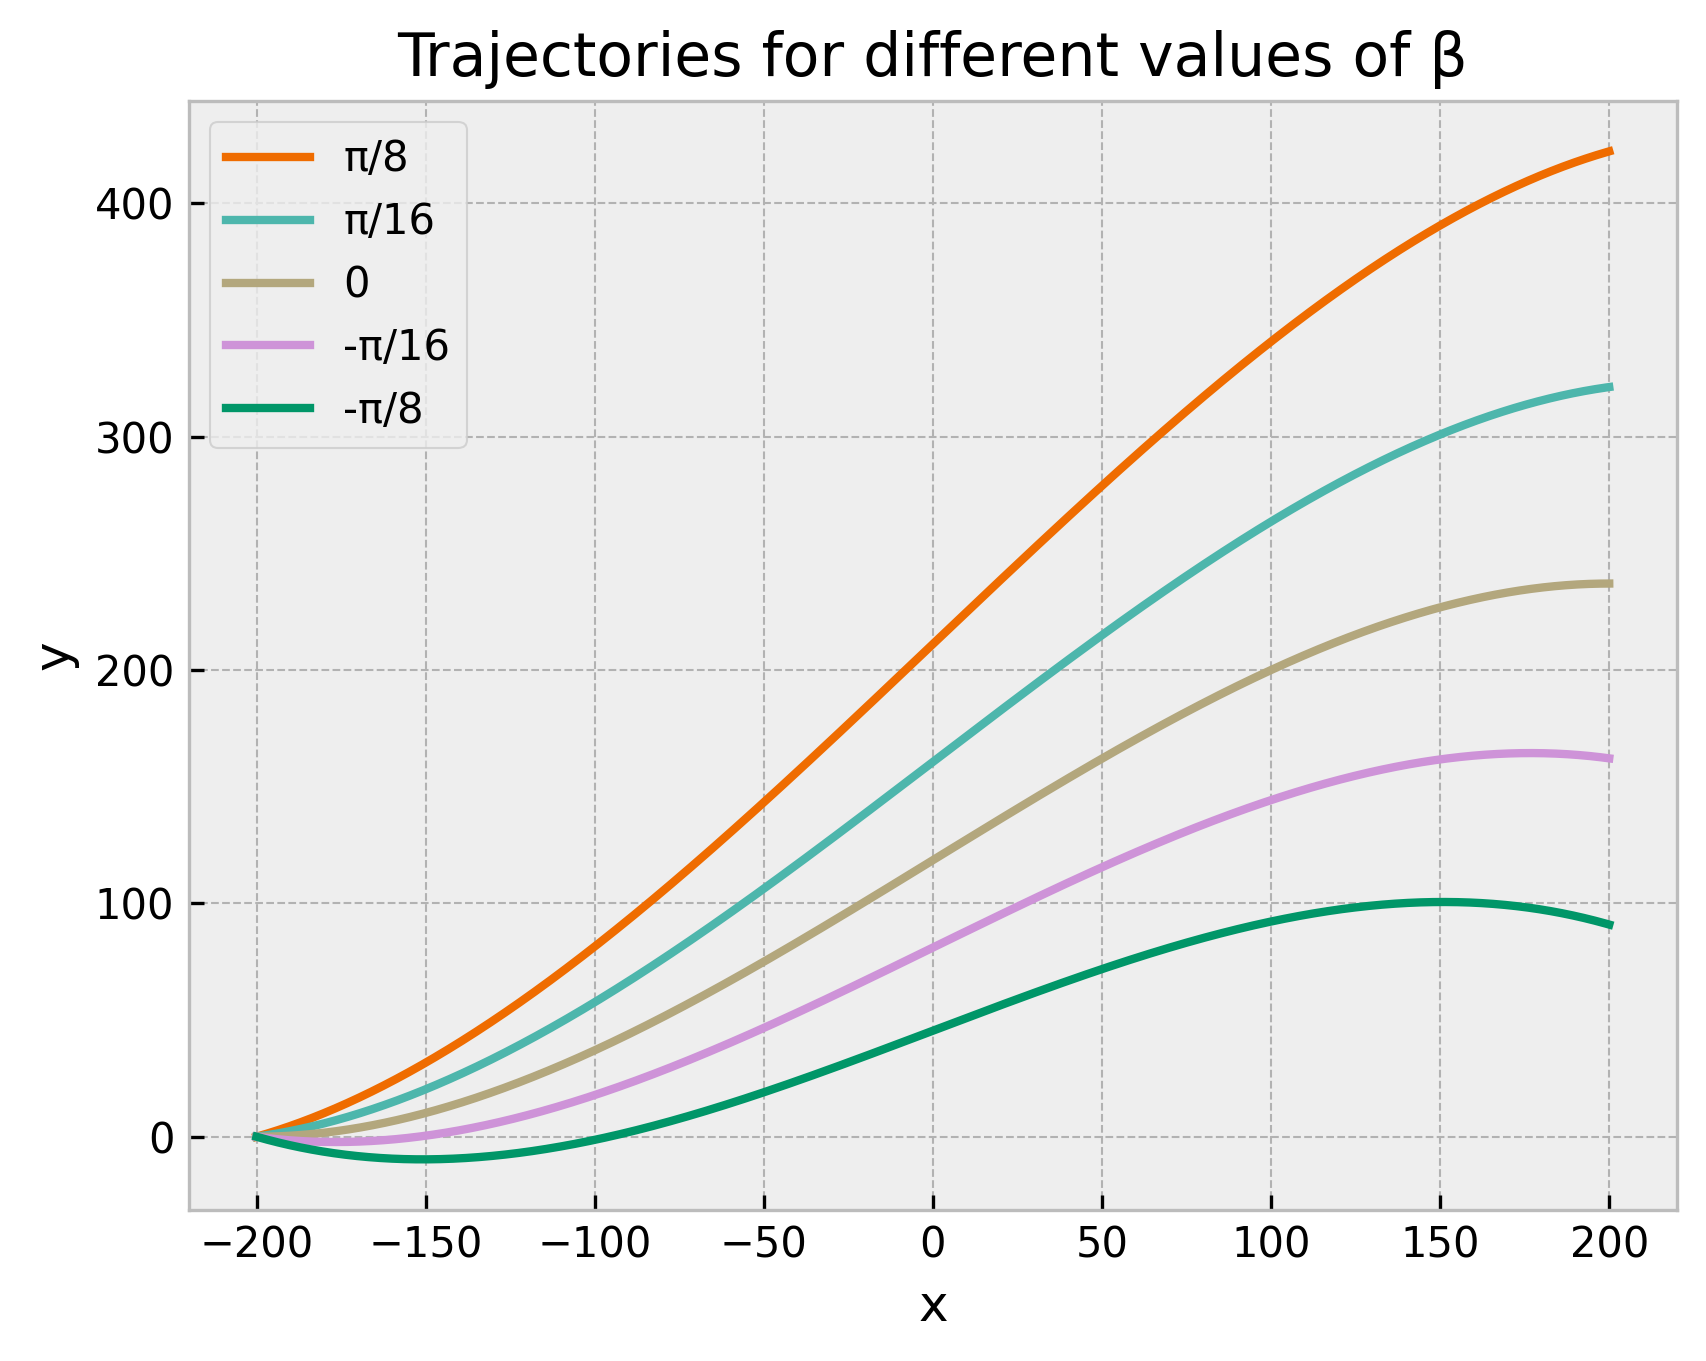

In [5]:
#euler method for solving the DE
def euler(a,v_s,v_w,b):
  x = -a
  y = 0
  h = (2*a)/10000
  traj_x = [-a]
  traj_y = [0]
  for i in range(0,10000):
    y = y+ h*(v_s*np.sin(b)+v_w*(1-x**2/(a**2)))/(v_s*np.cos(b))
    x = x+h
    traj_x.append(x)
    traj_y.append(y)
  return(y,traj_x,traj_y)

#all the 5 trajectories we need to find for the assignment
y1, traj_1x, traj_1y = euler(a,v_swimmer, v_water,np.pi/8)
plt.plot(traj_1x,traj_1y,color = "#ef6c00")
y2, traj_2x, traj_2y = euler(a,v_swimmer, v_water,np.pi/16)
plt.plot(traj_2x,traj_2y, color = '#4db6ac')
y3, traj_3x, traj_3y = euler(a,v_swimmer, v_water,0)
plt.plot(traj_3x,traj_3y, color = '#b3a77d')
y4, traj_4x, traj_4y = euler(a,v_swimmer, v_water,-np.pi/16)
plt.plot(traj_4x,traj_4y, color = '#ce93d8')
y5, traj_5x, traj_5y = euler(a,v_swimmer, v_water,-np.pi/8)
plt.plot(traj_5x,traj_5y, color = '#009668')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(['π/8','π/16','0','-π/16','-π/8'])
plt.title('Trajectories for different values of β')
#print(y1,y2,y3,y4,y5)


237.0666642959972


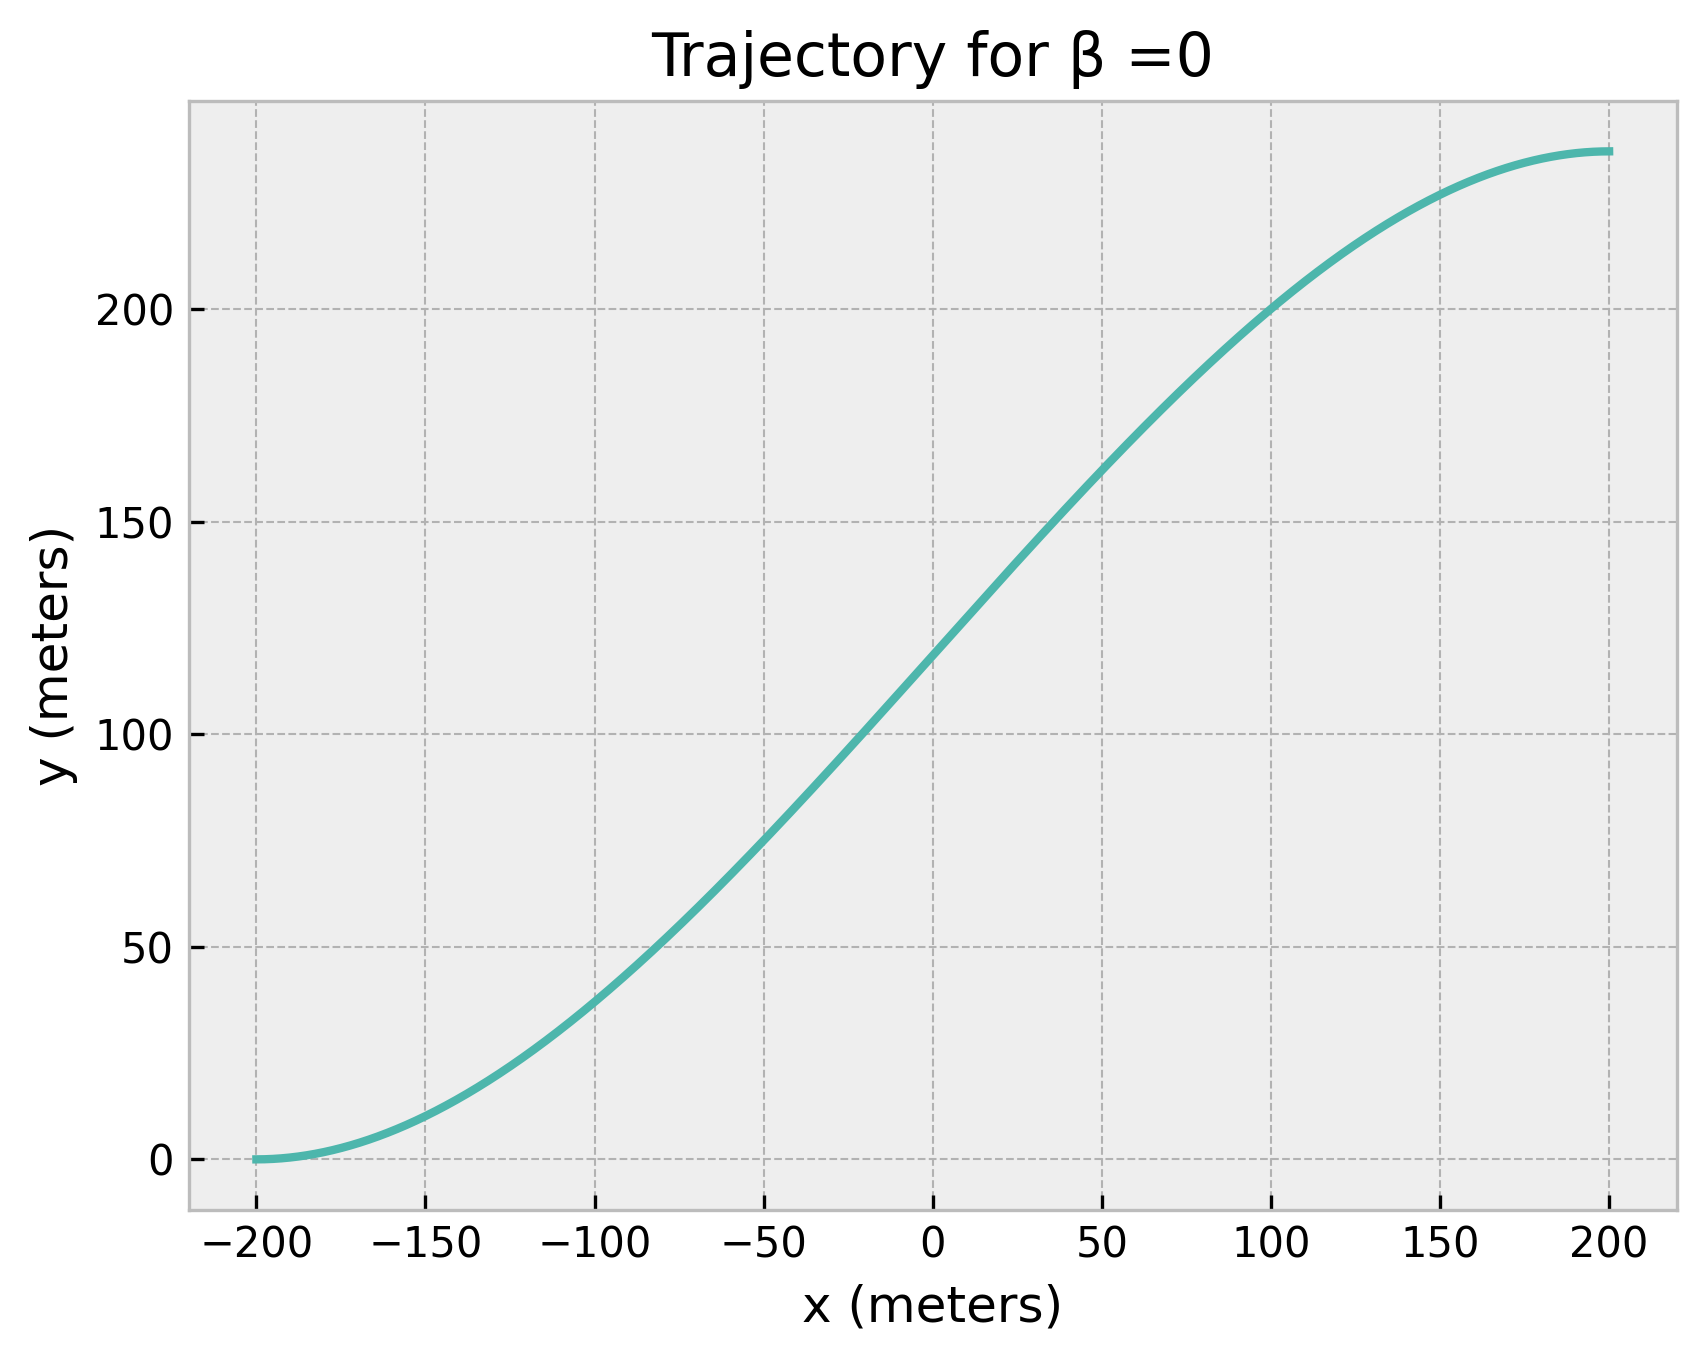

In [6]:
# graph and trajectory for beta = 0 specifically

plt.plot(traj_3x,traj_3y, color = '#4db6ac')
plt.xlabel('x (meters)')
plt.ylabel('y (meters)')
plt.title('Trajectory for β =0')
print(y3)


In [7]:
#path length
#length of the path for b = 0
def len_traj(arr_x, arr_y):
  length = 0
  for i in range(0, len(arr_x)-1):
    pyth = np.power(arr_x[i+1]-arr_x[i],2)+np.power(arr_y[i+1]-arr_y[i],2)
    #print(pyth)
    length += np.power(pyth,0.5)
  return length
print(len_traj(traj_3x,traj_3y))

474.58766962733404


10001
coef [ 1.18515552e+02  8.88999994e-01  4.44500000e-07 -7.40833333e-06]


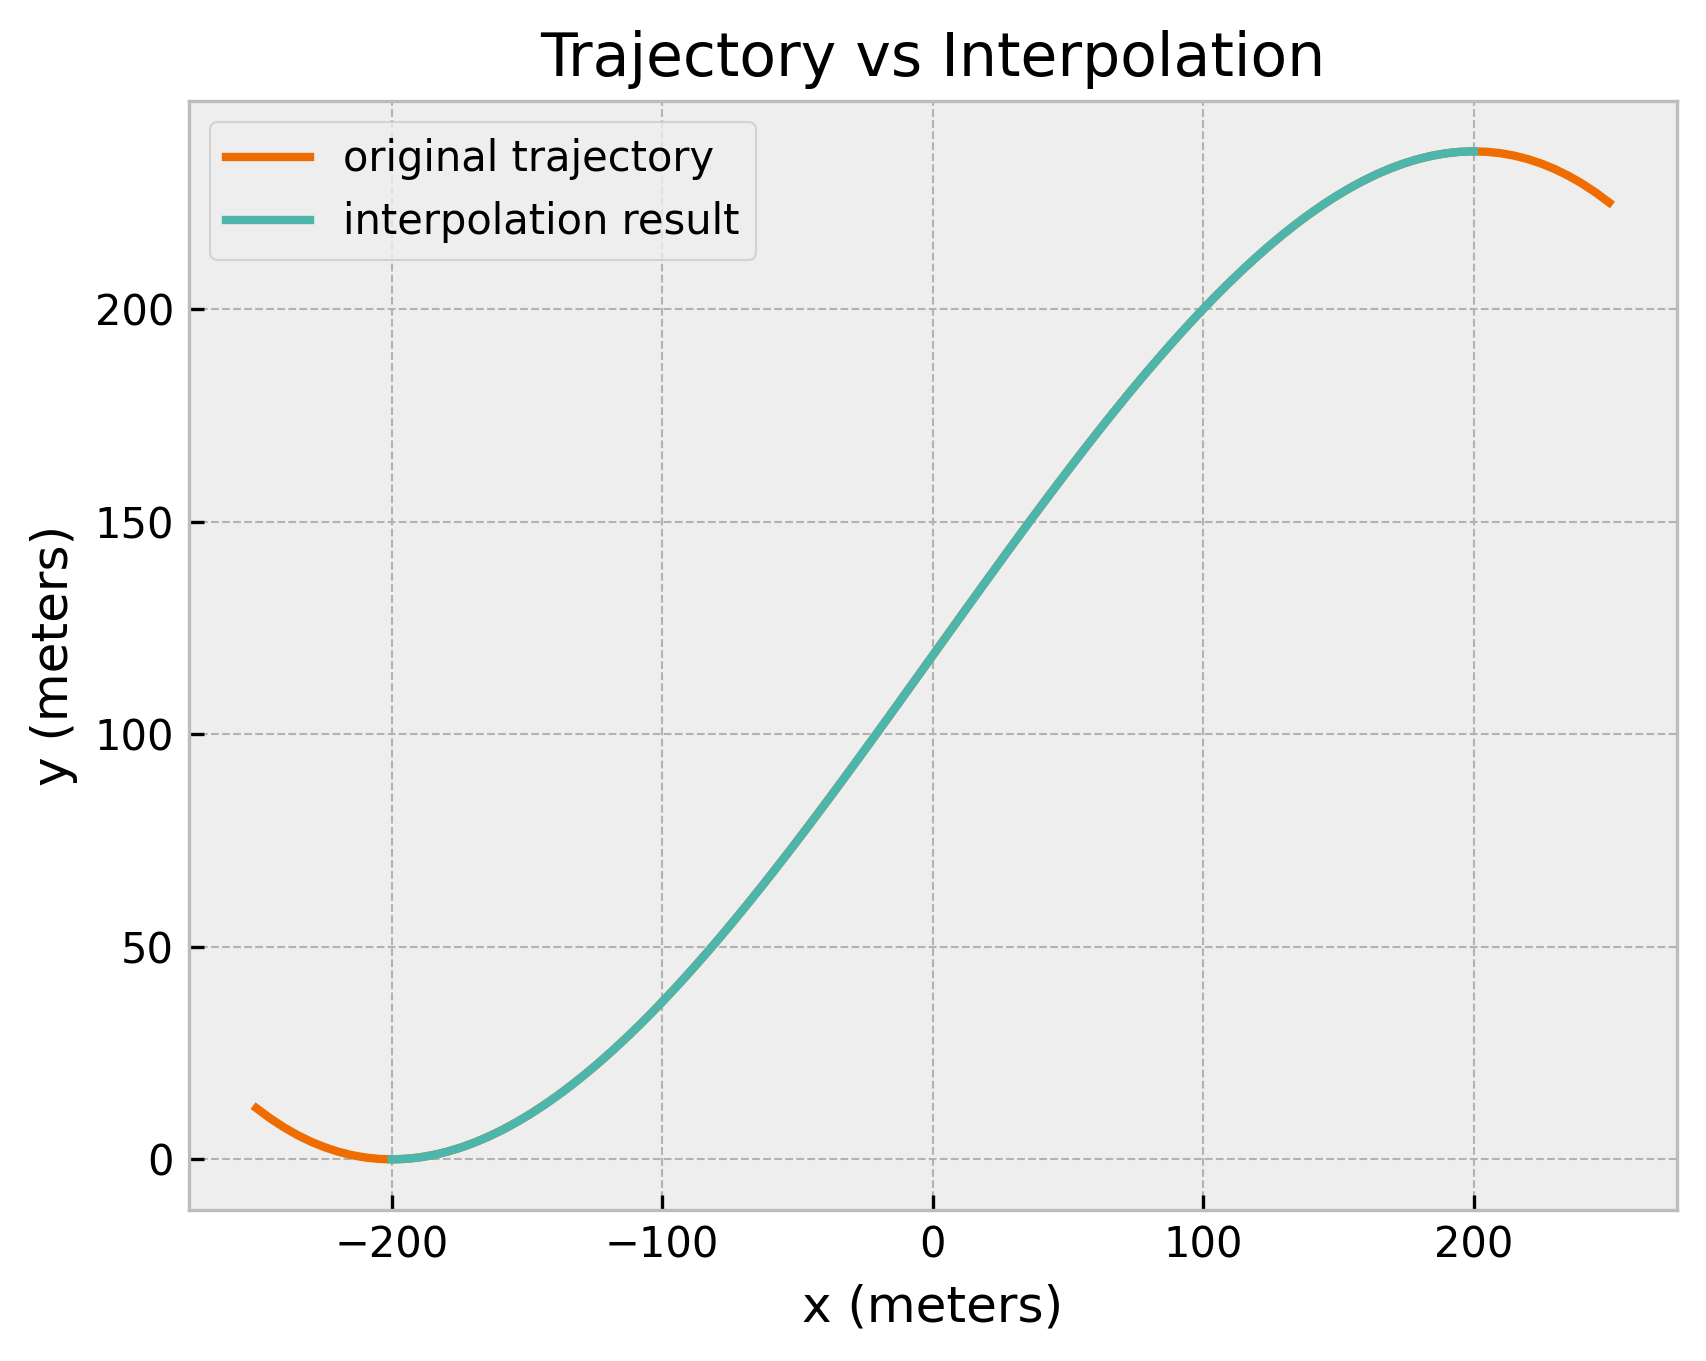

In [8]:
#interpolation for b = 0
print(len(traj_3x))
x_coord = [traj_3x[2000],traj_3x[4000],traj_3x[6000],traj_3x[8000]]
y_coord = [traj_3y[2000],traj_3y[4000],traj_3y[6000],traj_3y[8000]]
table = interpolate(x_coord,y_coord)
x = np.linspace(-250,250, num=100)
fx = []
for i in range(len(x)):
  fx.append(table[0]+table[1]*x[i]+table[2]*(x[i]**2)+table[3]*(x[i]**3))
plt.plot(x,fx, color = "#ef6c00")
plt.plot(traj_3x,traj_3y, color = '#4db6ac')

plt.xlabel('x (meters)')
plt.ylabel('y (meters)')
plt.title('Trajectory vs Interpolation')
plt.legend(['original trajectory','interpolation result'])
print('coef',table)


[236.74839697 399.65643976 128.72304491 144.33343846]


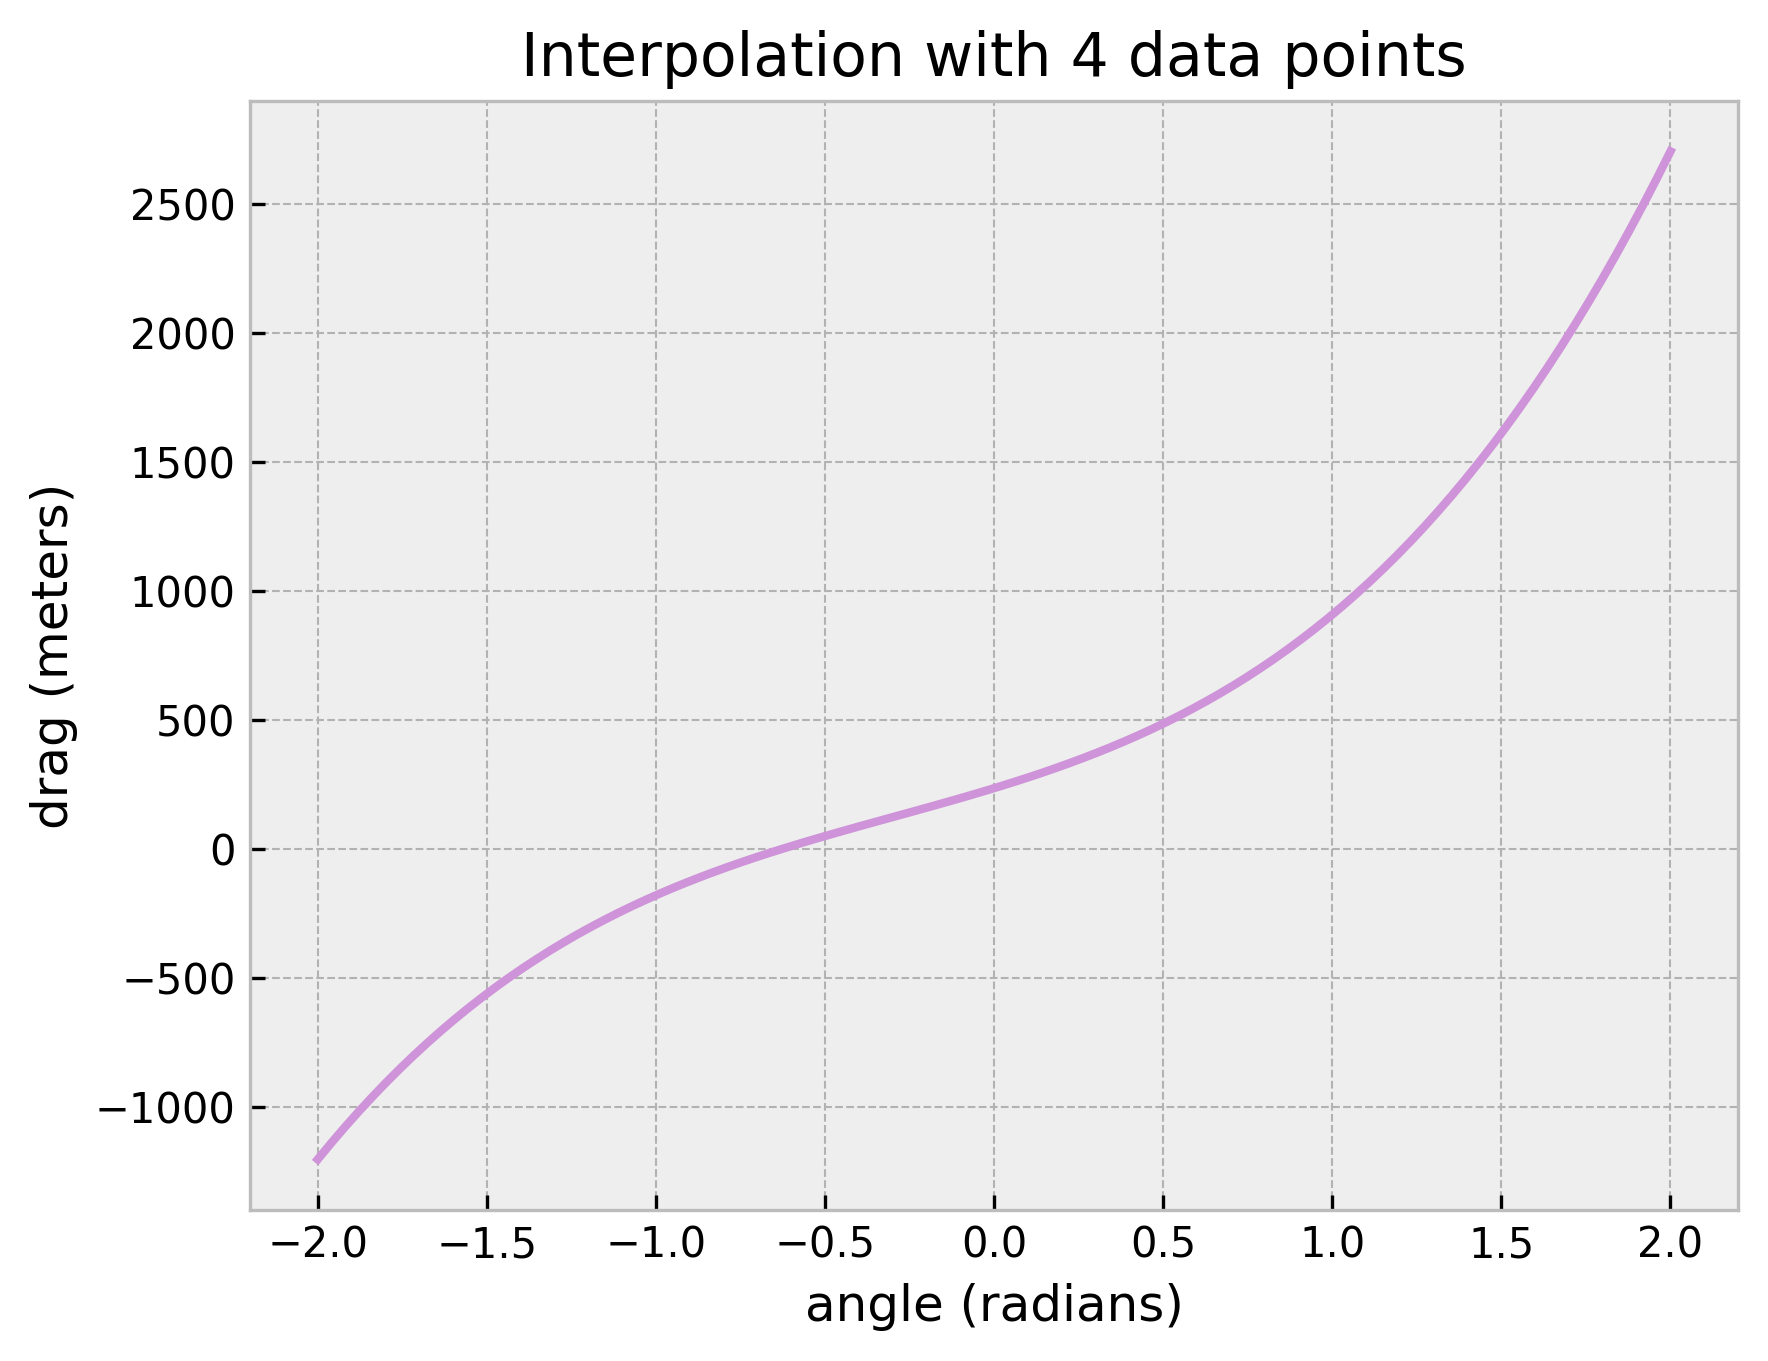

In [9]:
#4 point interpolation
drag_p = [y5,y4,y2,y1]
angles = [-np.pi/8,-np.pi/16,np.pi/16, np.pi/8]
angles_interp = interpolate(angles, drag_p)
x = np.linspace(-2,2, num=100)
fx = []
for i in range(len(x)):
  fx.append(angles_interp[0]+angles_interp[1]*x[i]+angles_interp[2]*(x[i]**2)+angles_interp[3]*(x[i]**3))

plt.plot(x,fx, color =  '#ce93d8')
plt.title('Interpolation with 4 data points')
plt.xlabel('angle (radians)')
plt.ylabel('drag (meters)')
print(angles_interp)

[237.0666643  399.65643976 118.40393376 144.33343846  53.53188126]


Text(0, 0.5, 'drag (meters)')

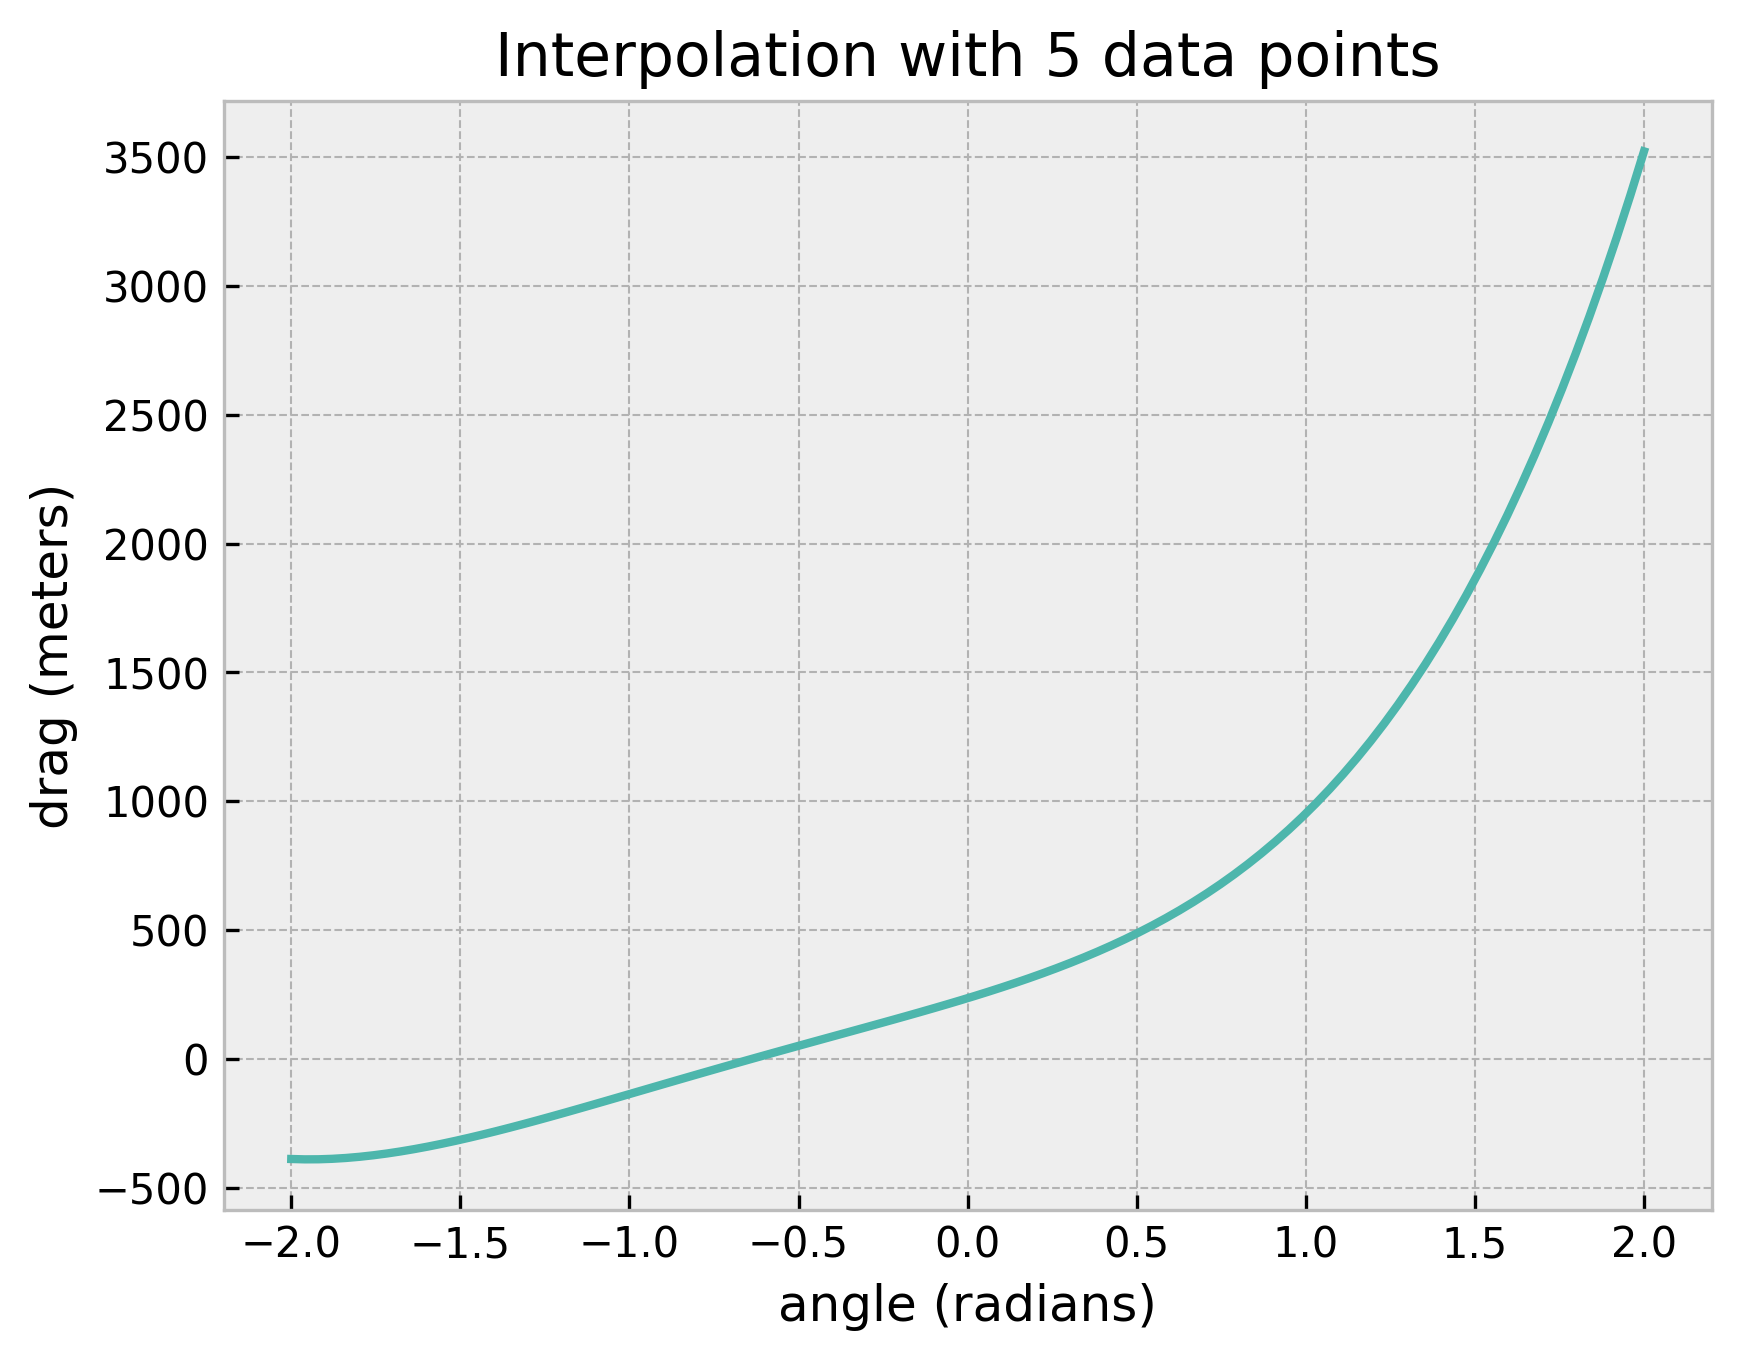

In [10]:
#5 point interpolation
drag_p = [y5,y4,y3,y2,y1]
angles = [-np.pi/8,-np.pi/16,0, np.pi/16, np.pi/8]
angles_interp2 = interpolate(angles, drag_p)
x = np.linspace(-2,2, num=100)
fx = []
for i in range(len(x)):
  fx.append(angles_interp2[0]+angles_interp2[1]*x[i]+angles_interp2[2]*(x[i]**2)+angles_interp2[3]*(x[i]**3)++angles_interp2[4]*(x[i]**4))
print(angles_interp2)
plt.plot(x,fx, color = '#4db6ac')
plt.title('Interpolation with 5 data points')
plt.xlabel('angle (radians)')
plt.ylabel('drag (meters)')

result of the secant method for 3rd-order polynomial: -0.6346426415569663
drag value: -0.11057382123875431
result of the secant method for 4th order polynomial: -0.6266455173268008
drag value: 3.0793741104189833


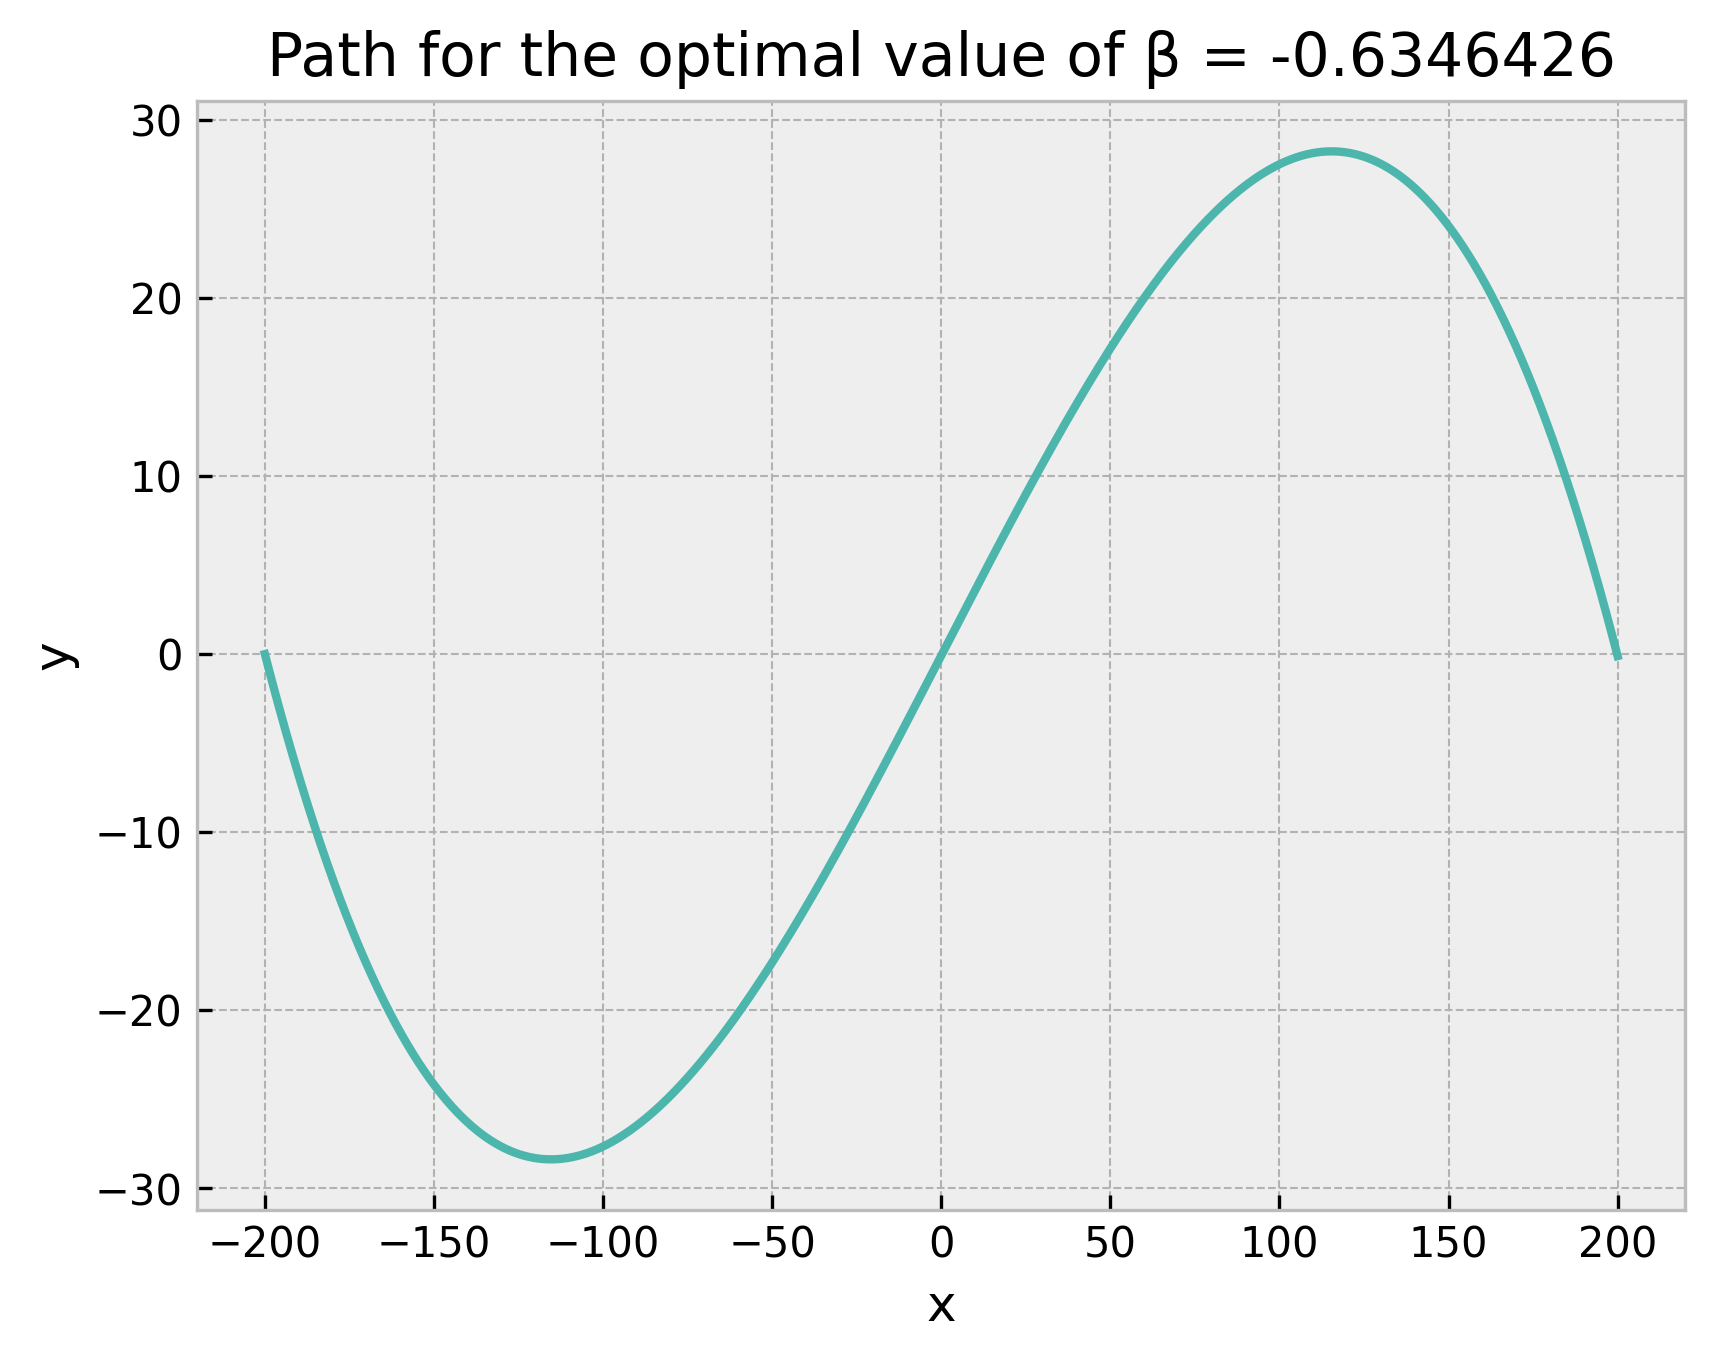

In [11]:

print('result of the secant method for 3rd-order polynomial:', secant(f,-0.8,-0.7,angles_interp))
yopt, txopt, tyopt = euler(a,v_swimmer,v_water,-0.6346420104050033)
print('drag value:',yopt)
plt.plot(txopt,tyopt,color = '#4db6ac')
plt.title('Path for the optimal value of β = -0.6346426')
plt.xlabel('x')
plt.ylabel('y')

#5-point interpolation result
print('result of the secant method for 4th order polynomial:', secant(f,-0.8,-0.7,angles_interp2))
y2opt, tx2opt, ty2opt = euler(a,v_swimmer,v_water,-0.6266455173268011)
print('drag value:', y2opt)

In [12]:
#fooling around, testing the sensitivity of drag to initial angle
yf1, txf1, tyf2 = euler(a,v_swimmer,v_water,1)
print(yf1)

yf2, txf1, tyf2 = euler(a,v_swimmer,v_water,1.001)
print(yf2)

yf3, txf1, tyf2 = euler(a,v_swimmer,v_water,1.002)
print(yf3)

yf4, txf1, tyf2 = euler(a,v_swimmer,v_water,1.003)
print(yf4)

1061.7297982791815
1063.7867680782017
1065.8506092516598
1067.9213582234001
